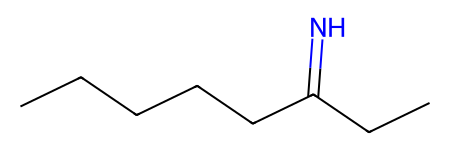

In [19]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

Imine_Formation2 = { "Name": " Addition of amines on acidic conditions","Start": "CC(=O)C" ,"Start2":"NC", "Condition" : "4<pH<6",  "Finish":"CC(=NC)C" }
Imine_Formation1 = { "Name": "Addition of amines on basic conditions" ,"Start": "CC(=O)C" , "Start2":"NC","Condition" : "pH>6",  "Finish":"CC(=NC)C" }

def Imine_Formation2_function(start_input_smiles, condition_input):

    Imine_Formation2 = { "Name": "Addition of amines on acidic conditions",
        "Start": "C(=O)C", 
        "Condition": "4<pH<6",
        "Finish": "C(=N)C"}  
    
    input_mol = Chem.MolFromSmiles(start_input_smiles)
    start_mol = Chem.MolFromSmiles(Imine_Formation2["Start"])

   
    if input_mol.HasSubstructMatch(start_mol) and Imine_Formation2["Condition"] == condition_input:
        for match in input_mol.GetSubstructMatches(start_mol):
            edit_mol = Chem.EditableMol(input_mol)
            _, carbonyl_idx, _ = match  # Match indices: start C, C=O, end C
          
            edit_mol.ReplaceAtom(carbonyl_idx, Chem.Atom(7))
            
            modified_mol = edit_mol.GetMol()
            
            Chem.SanitizeMol(modified_mol)
            
            final_mol = Chem.MolToSmiles(modified_mol, isomericSmiles=True)
            molecule = Chem.MolFromSmiles(final_mol)
            
            return molecule 
            
    return "No suitable reaction found for the given start material and condition."

# Example usage:
start_input_smiles = "CCC(=O)CCCCC"
condition_input = "4<pH<6"
Imine_Formation2_function (start_input_smiles , condition_input)


#molecule = Chem.MolFromSmiles(start_input_smiles)
#Draw.MolToImage(molecule)

In [27]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

#PROBLEEEEEEMEEEE

def Cyclic_Acetal1_function(start1_input_smiles, star2_input_smiles, condition_input):

### Reaction details and patterns to match 
    
    Cyclic_Acetal_Formation1= { "Name":"Formation of cyclic acetal from diols addition with 2 carbons ",
                           "Start": "CC(=O)C" ,
                           "Start2":"OCCO",
                           "Condition" : "Acid",  
                           "Finish":"C1(C)(C)OCCO1"}


    input_mol1 = Chem.MolFromSmiles(start1_input_smiles)
    input_mol1 = Chem.MolFromSmiles(start2_input_smiles)
    
    start_mol1 = Chem.MolFromSmiles(Cyclic_Acetal_Formation1["Start"])
    start_mol2 = Chem.MolFromSmiles(Cyclic_Acetal_Formation1["Start2"])
    
    if input_mol1.HasSubstructMatch(start_mol1) and input_mol2.HasSubstructMatch(start_mol2):
        
        product_mol = Chem.MolFromSmiles(Cyclic_Acetal_Formation["Finish"])
        return Chem.MolFromSmiles(product_mol)

    return "No suitable reaction found for the given start material and condition."


# Example usage:
start1_input_smiles = "CCCC(=O)C"
start2_input_smiles = "OCCO"
condition_input = "Acid"
Cyclic_Acetal1_function (start1_input_smiles ,start2_input_smiles, condition_input)


'No suitable reaction found for the given start material and condition.'

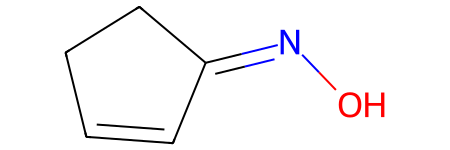

In [27]:
from rdkit import Chem
from rdkit.Chem import AllChem

def OxineFormation_function(start_input_smiles, start2_input_smiles):
    oxine_formation = {
        "Name": "Addition of nucleophilic nitrogen to form an oxine",
        "Start": "C(=O)",  
        "Start2": "NO",
        "Finish": "C(=NO)" 
    }

    molecule1 = Chem.MolFromSmiles(start_input_smiles)
    molecule2 = Chem.MolFromSmiles(start2_input_smiles)
    
    pattern1 = Chem.MolFromSmarts(oxine_formation["Start"])  
    nitroso_pattern = Chem.MolFromSmarts(oxine_formation["Start2"]) 
    
    if molecule1.HasSubstructMatch(pattern1) and molecule2.HasSubstructMatch(nitroso_pattern):
        modified_smiles = start_input_smiles.replace("C(=O)", "C(=NO)")
        final_mol = Chem.MolFromSmiles(modified_smiles)
        
        return final_mol

    return "No suitable reaction found for the given start materials."

# Example usage:
#start_smiles1 = "C1CCCC(=O)C1"  # Example cyclic molecule containing a ketone group
start_smiles1 = "c1C(=O)cCc1"
start_smiles2 = "NO"      # Simple representation of a nucleophilic nitrogen
OxineFormation_function(start_smiles1, start_smiles2)



In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem

def WolfKishner_function(start_input_smiles,condition_input):
    
    wolf_kishner_huang_reduction = { "Finish" : "CCC",
                                    "Condition" : "NH2NH2, KOH, 180°C",
                                    "Start" : "CC(=O)C", 
                                    "Name" : "Wolf-Kishner-Huang Reduction" }
    molecule = Chem.MolFromSmiles(start_input_smiles)

# recognize the pattern to modify 
    
    pattern = Chem.MolFromSmarts(wolf_kishner_huang_reduction["Start"])
    if molecule.HasSubstructMatch(pattern):
# The Wolf Kishner Reduction of a Carbonyl 
        finish_smiles = start_input_smiles.replace("C(=O)", "C")
        final_mol = Chem.MolFromSmiles(finish_smiles)
    
        return final_mol
            
    return "No suitable reaction found for the given start material and condition."

# Example Usage 
start_smiles = "CCC(=O)CC(=O)CC"
condition = "NH2NH2, KOH, 180°C"
m = WolfKishner_function(start_smiles, condition)


msmile = Chem.MolToSmiles(m)

assert msmile == 'CCCCCCC'

AssertionError: 

In [ ]:
assert WolfKishner_function('') == 'no reaction found'

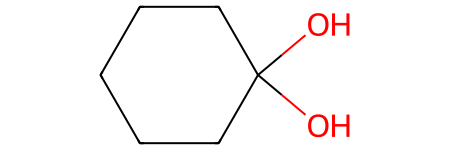

In [38]:
from rdkit import Chem
from rdkit.Chem import AllChem

def Hydration_function(input_smiles, condition_input):
    hydration = {
        "Name": "Hydration of Carbonyls",
        "Start": "C=O",     # Target the carbonyl group directly
        "Condition": "H2O and acid",
        "Finish": "[O-][H+]"   # Represent the hydrated form
    }

   
    molecule = Chem.MolFromSmiles(input_smiles)

    
    pattern = Chem.MolFromSmarts(hydration["Start"])  
    if molecule.HasSubstructMatch(pattern):
     
        finish_mol = Chem.MolFromSmiles("C(O)(O)")
        modified_mols = AllChem.ReplaceSubstructs(molecule, pattern, finish_mol, replaceAll=True)
        final_mol = Chem.MolToSmiles(modified_mols[0], isomericSmiles=True)
        molecule = Chem.MolFromSmiles(final_mol)
        
        return molecule 

    return "No suitable reaction found for the given start material and conditions."

# Example usage:
input_smiles = "c1cc(=O)cc1"  
#input_smiles = "C1CCC(=O)CC1"
condition = "H2O and acid"
Hydration_function(input_smiles, condition)

